In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,balanced_accuracy_score,ConfusionMatrixDisplay,cohen_kappa_score,precision_score,recall_score

In [2]:
heart=pd.read_csv('/home/eeswar/Downloads/datasets/heart_disease.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      321 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  320 non-null    float64
 8   exng      321 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


In [4]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        3
fbs         0
restecg     0
thalachh    4
exng        3
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart['chol'].fillna(heart['chol'].mean(),inplace=True)
heart['thalachh'].fillna(heart['thalachh'].mean(),inplace=True)
heart['exng'].fillna(heart['exng'].mean(),inplace=True)

In [6]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
print(heart.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
heart['output'] = heart['output'].astype('int64')

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      324 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  324 non-null    float64
 8   exng      324 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


In [10]:
heart.shape

(324, 14)

In [11]:
heart.age.nunique()

41

In [12]:
heart[(heart['age']>50) & (heart['output']==1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148.0,0.0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153.0,0.0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,58,0,0,130,197.0,0,1,131.0,0.0,0.6,1,0,2,1
158,58,1,1,125,220.0,0,1,144.0,0.0,0.4,1,4,3,1
159,56,1,1,130,221.0,0,0,163.0,0.0,0.0,2,0,3,1
160,56,1,1,120,240.0,0,1,169.0,0.0,0.0,0,0,2,1


In [13]:
(heart['age']>=50).value_counts()

age
True     232
False     92
Name: count, dtype: int64

In [25]:
heart['age'].mean()

54.51851851851852

In [26]:
heart[(heart['age']<54) & (heart['output']==0)]['output'].value_counts()

output
0    42
Name: count, dtype: int64

In [27]:
heart[(heart['age']<54) & (heart['output']==1)]['output'].value_counts()

output
1    90
Name: count, dtype: int64

In [28]:
(heart['age']<54).value_counts()

age
False    192
True     132
Name: count, dtype: int64

In [29]:
heart['output'].value_counts()

output
1    165
0    159
Name: count, dtype: int64

In [30]:
(heart['age']<54).value_counts()

age
False    192
True     132
Name: count, dtype: int64

In [31]:
heart[(heart['age']>=54) & (heart['output']==0)]['output'].value_counts()

output
0    117
Name: count, dtype: int64

In [32]:
heart[(heart['age']>=54) & (heart['output']==1)]['output'].value_counts()

output
1    75
Name: count, dtype: int64

In [33]:
heart['sex'].value_counts()

sex
1    223
0    101
Name: count, dtype: int64

In [34]:
heart[(heart['sex']==1) & (heart['output']==0)].shape#['output'].value_counts()

(130, 14)

In [35]:
table=pd.crosstab(heart['output'],heart['age'])
table

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
output,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,3,1,1,3,...,4,3,7,3,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


In [36]:
table = pd.crosstab(heart['sex'],heart['output'])

In [37]:
table

output,0,1
sex,,
0,29,72
1,130,93


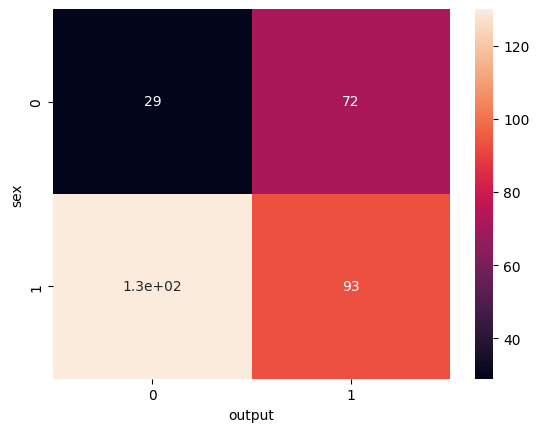

In [38]:
sns.heatmap(table,annot=True)
plt.show()

In [39]:
tabcp=pd.crosstab(heart['cp'],heart['output'])

<Axes: xlabel='output', ylabel='cp'>

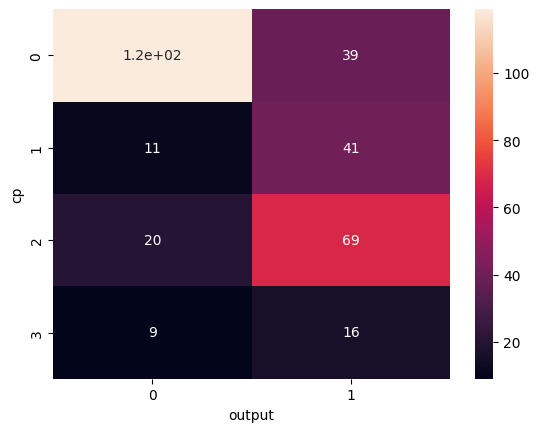

In [40]:
sns.heatmap(tabcp,annot=True)

<Axes: xlabel='cp', ylabel='sex'>

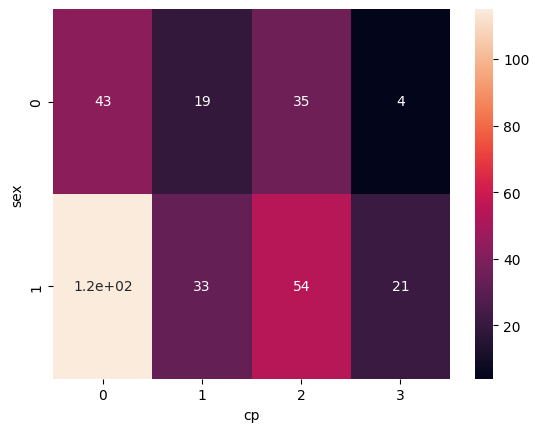

In [41]:
cat_tab=pd.crosstab(heart['sex'],heart['cp'])
sns.heatmap(cat_tab,annot=True)

In [42]:
df=pd.DataFrame(heart['sex'],heart['cp']).reset_index()
df

,cp,sex
0,3,1
1,2,0
2,1,1
3,1,1
4,0,1
...,...,...
319,0,1
320,3,1
321,0,1
322,0,1


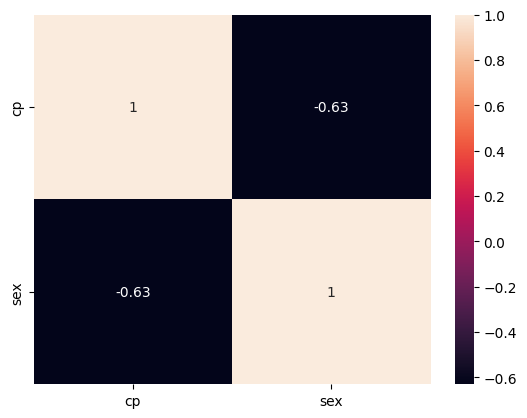

In [43]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [44]:
heart['chol'].min(),heart['chol'].max()

(126.0, 564.0)

In [45]:
heart['chol'].mode()

0    204.0
Name: chol, dtype: float64

In [46]:
heart[heart['chol']==204]['output'].value_counts()

output
1    4
0    3
Name: count, dtype: int64

In [47]:
heart['chol'].mean()

244.59813084112147

In [48]:
heart[heart['chol']<=240]['output'].value_counts()

output
1    91
0    75
Name: count, dtype: int64

In [49]:
heart[heart['chol']>240]['output'].value_counts()

output
0    84
1    74
Name: count, dtype: int64

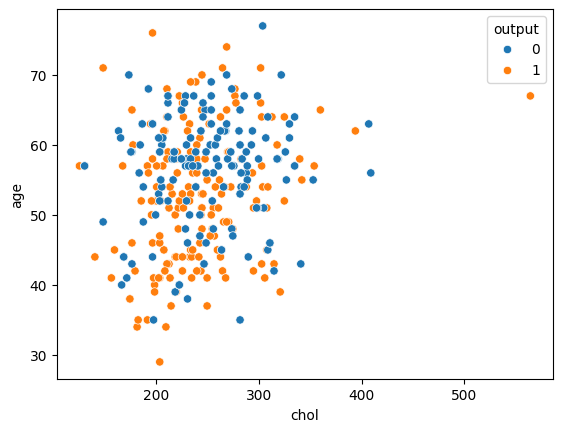

In [50]:
sns.scatterplot(x='chol',y='age',data=heart,hue='output')
plt.show()

In [51]:
heart[(heart['chol'] > 199) & (heart['chol'] < 240)]['output'].value_counts()

output
1    59
0    49
Name: count, dtype: int64

In [52]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1


In [53]:
heart['fbs'].value_counts()

fbs
0    275
1     49
Name: count, dtype: int64

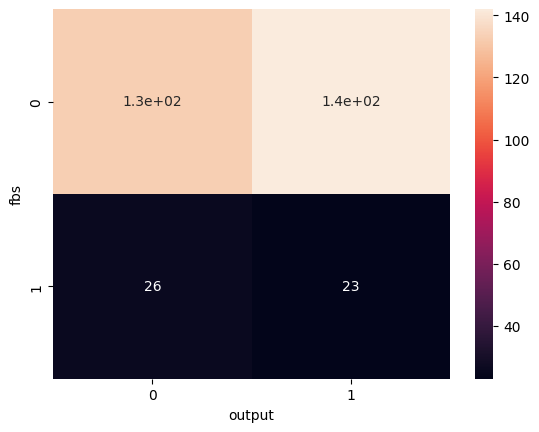

In [54]:
heat=pd.crosstab(heart['fbs'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

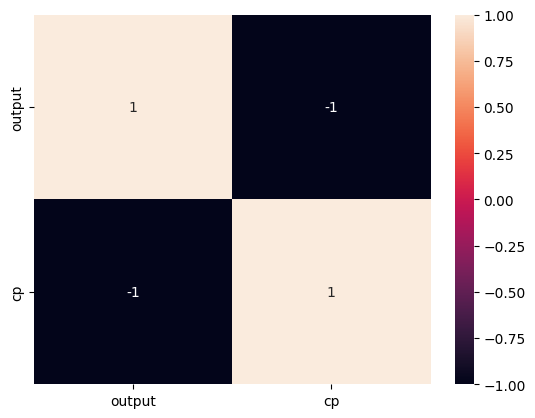

In [55]:
df=pd.DataFrame(heart['cp'],heart['output']).reset_index()
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [56]:
df=pd.DataFrame(heart['sex'],heart['output']).reset_index()
corr=df.corr()
corr

,output,sex
output,1.0,NaN
sex,NaN,NaN


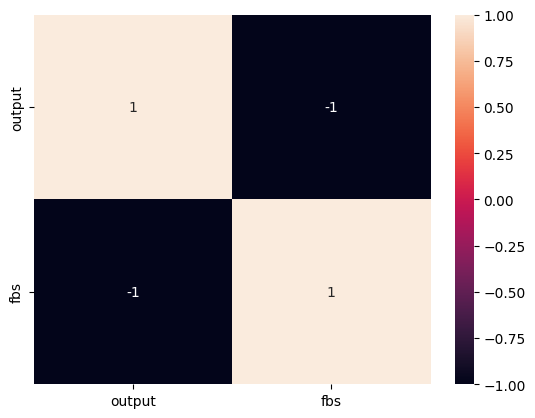

In [57]:
df=pd.DataFrame(heart['fbs'],heart['output']).reset_index()
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

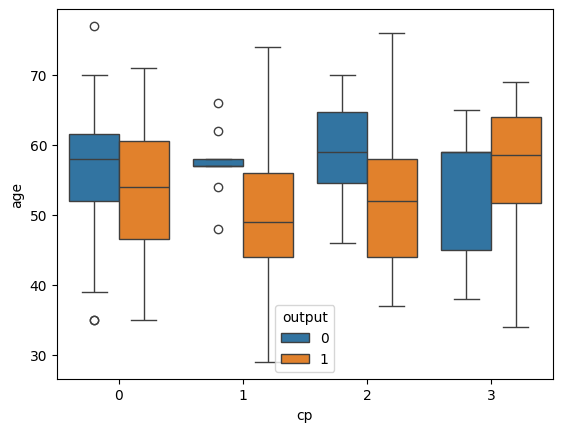

In [58]:
sns.boxplot(x='cp', y='age', data=heart,hue='output')
plt.show()

In [59]:
heart['restecg'].value_counts()

restecg
1    164
0    154
2      6
Name: count, dtype: int64

In [60]:
grouped_data = heart.groupby(['cp', 'output'])['age'].describe()
print(grouped_data)

           count       mean        std   min    25%   50%    75%   max
cp output                                                             
0  0       119.0  56.319328   8.025312  35.0  52.00  58.0  61.50  77.0
   1        39.0  54.076923   8.709899  35.0  46.50  54.0  60.50  71.0
1  0        11.0  57.363636   4.433345  48.0  57.00  57.0  58.00  66.0
   1        41.0  50.024390   9.786439  29.0  44.00  49.0  56.00  74.0
2  0        20.0  58.950000   7.605227  46.0  54.50  59.0  64.75  70.0
   1        69.0  52.217391   9.422860  37.0  44.00  52.0  58.00  76.0
3  0         9.0  54.444444   9.261629  38.0  45.00  59.0  59.00  65.0
   1        16.0  56.187500  10.444895  34.0  51.75  58.5  64.00  69.0


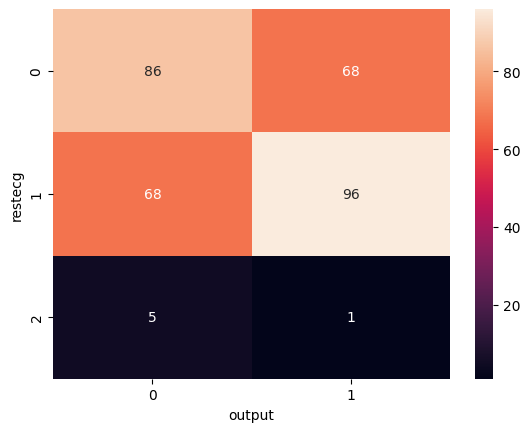

In [61]:
heat=pd.crosstab(heart['restecg'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

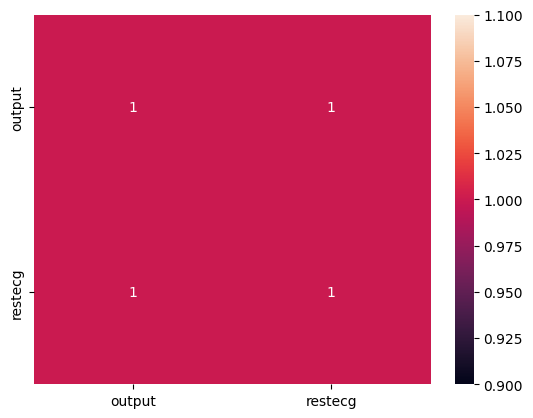

In [62]:
df=pd.DataFrame(heart['restecg'],heart['output']).reset_index()
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [63]:
heart['thalachh'].min(),heart['thalachh'].max()

(71.0, 202.0)

In [64]:
heart[(heart['thalachh'])==(heart['thalachh'].mode()[0])]['output'].value_counts()

output
1    8
0    4
Name: count, dtype: int64

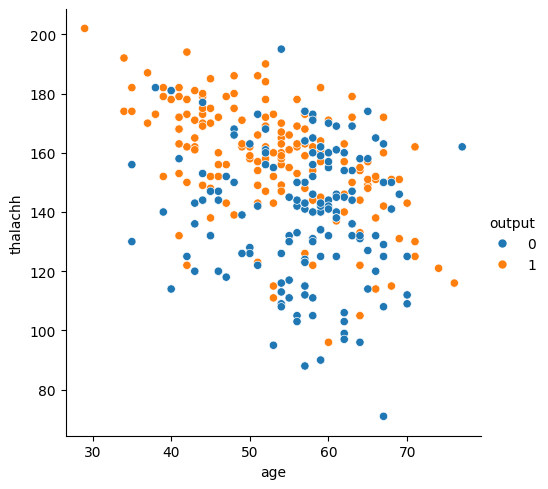

In [65]:
sns.relplot(x='age',y='thalachh',hue='output',data=heart)
plt.show()

In [66]:
heart[heart['thalachh']>140]['output'].value_counts()

output
1    141
0     84
Name: count, dtype: int64

In [67]:
heart[heart['thalachh']<=140]['output'].value_counts()

output
0    75
1    24
Name: count, dtype: int64

In [68]:
heart['thalachh'].mean()

149.08124999999998

In [69]:
heart[heart['thalachh']>149]['output'].value_counts()

output
1    124
0     55
Name: count, dtype: int64

In [70]:
heart[heart['thalachh']<=149]['output'].value_counts()

output
0    104
1     41
Name: count, dtype: int64

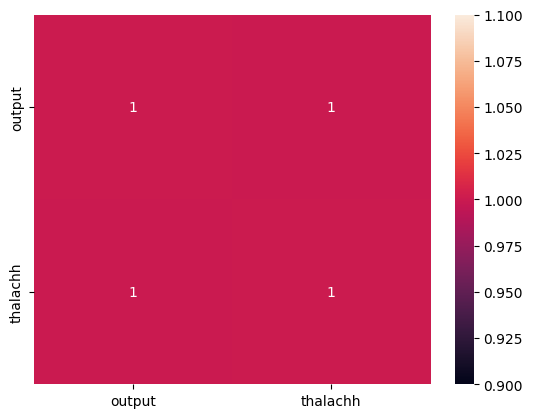

In [71]:
df=pd.DataFrame(heart['thalachh'],heart['output']).reset_index()
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [72]:
heart['exng'].value_counts()

exng
0.000000    213
1.000000    108
0.336449      3
Name: count, dtype: int64

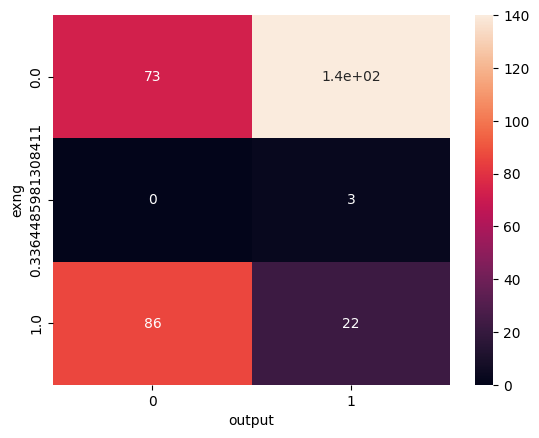

In [73]:
heat=pd.crosstab(heart['exng'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

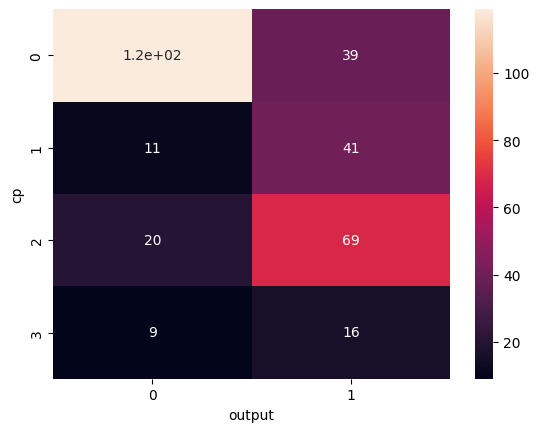

In [74]:
heat=pd.crosstab(heart['cp'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

In [75]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1


In [76]:
heart['oldpeak'].nunique()

40

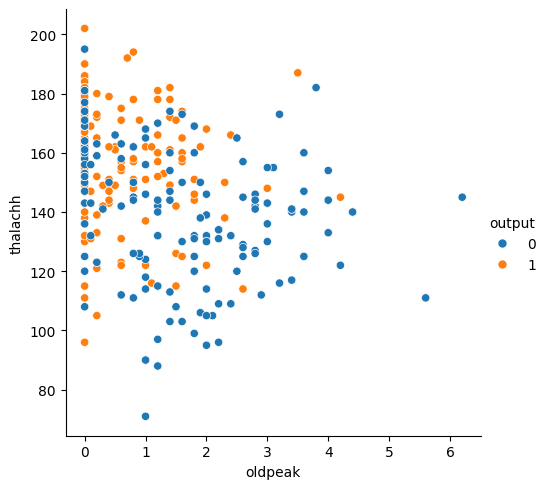

In [77]:
sns.relplot(x='oldpeak',y='thalachh',data=heart,hue='output')
plt.show()

In [78]:
heart[heart['oldpeak']==0]['output'].value_counts()

output
1    74
0    30
Name: count, dtype: int64

In [79]:
heart[(heart['oldpeak']>0) & ((heart['thalachh']>=140) & (heart['thalachh']<180))]['output'].value_counts()

output
1    68
0    63
Name: count, dtype: int64

In [80]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1


In [81]:
heart['slp'].nunique()

3

In [82]:
heart['slp'].unique()

array([0, 2, 1])

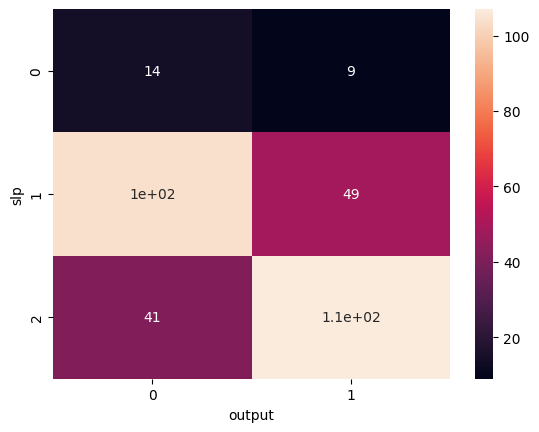

In [83]:
heat=pd.crosstab(heart['slp'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

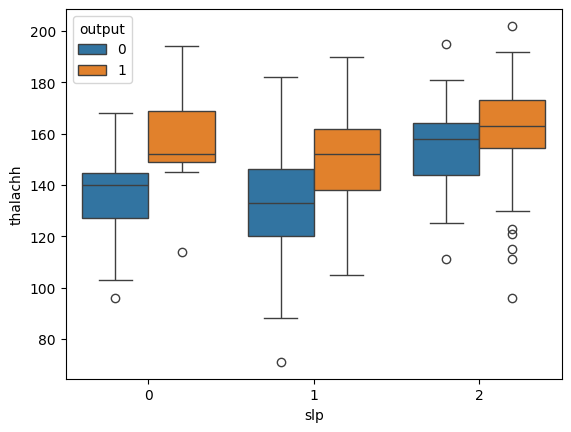

In [84]:
sns.boxplot(x='slp',y='thalachh',data=heart,hue='output')
plt.show()

In [85]:
heart['caa'].unique()

array([0, 2, 1, 3, 4])

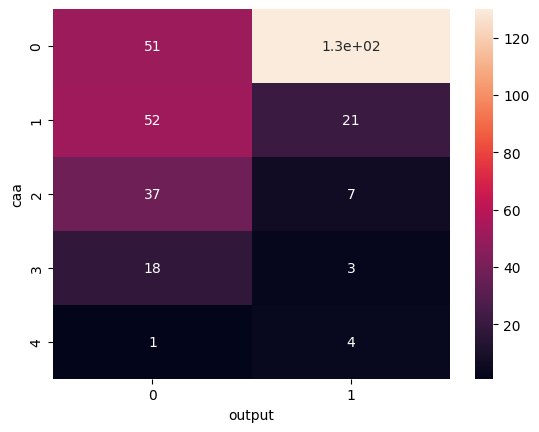

In [86]:
heat=pd.crosstab(heart['caa'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

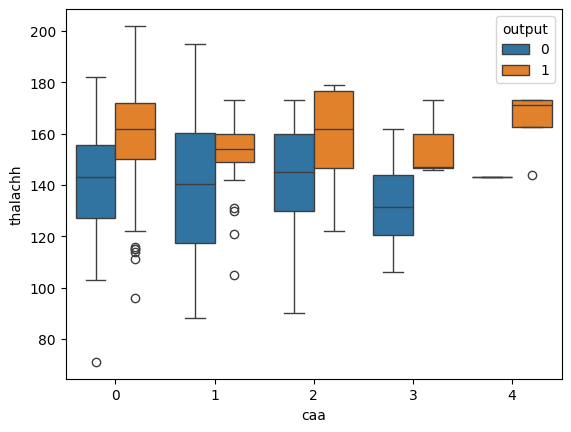

In [87]:
sns.boxplot(x='caa',y='thalachh',data=heart,hue='output')
plt.show()

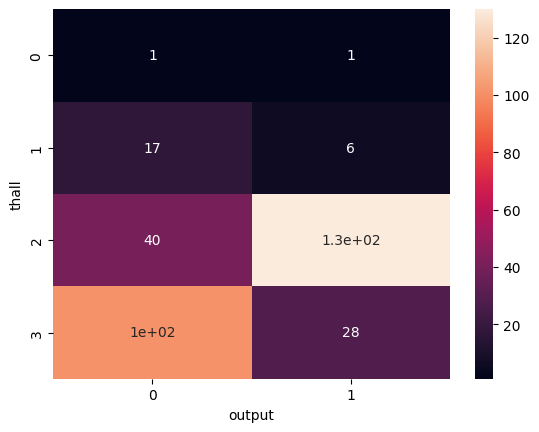

In [88]:
heat=pd.crosstab(heart['thall'],heart['output'])
sns.heatmap(heat,annot=True)
plt.show()

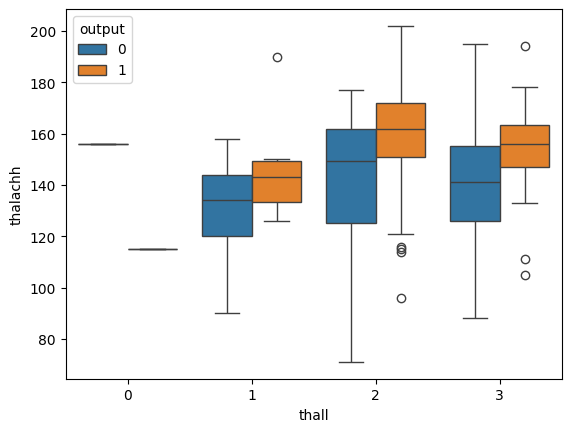

In [89]:
sns.boxplot(x='thall',y='thalachh',data=heart,hue='output')
plt.show()

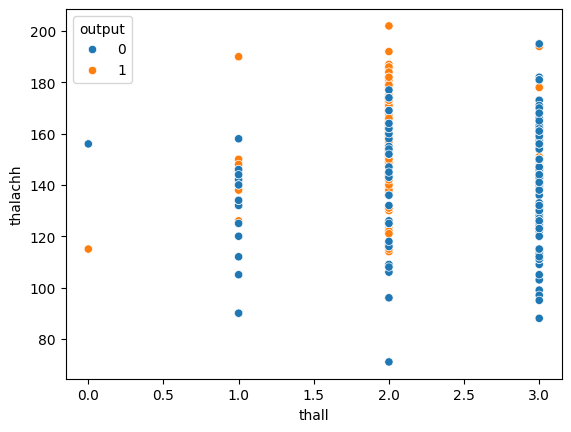

In [90]:
sns.scatterplot(x='thall',y='thalachh',data=heart,hue='output')
plt.show()

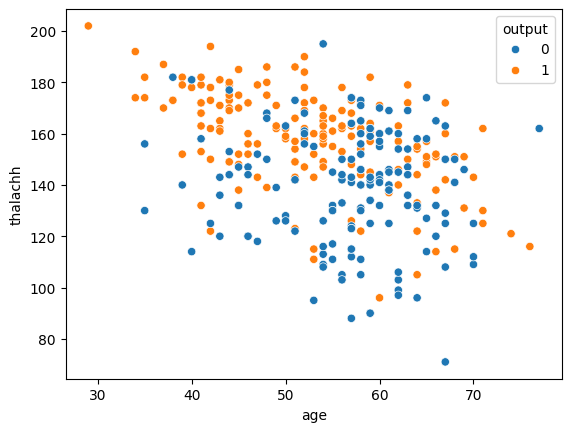

In [91]:
sns.scatterplot(x='age',y='thalachh',data=heart,hue='output')
plt.show()

In [92]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1


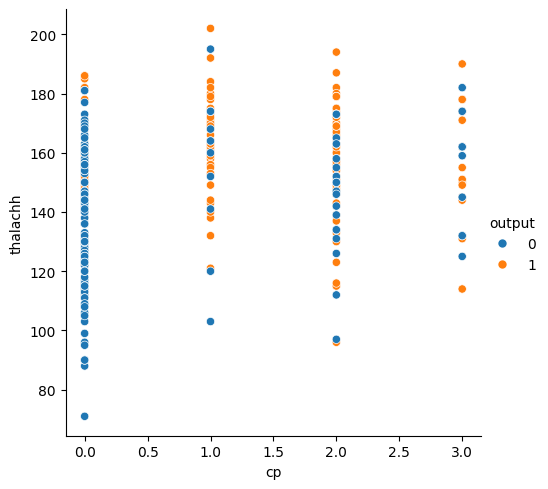

In [93]:
sns.relplot(x='cp',y='thalachh',data=heart,hue='output')
plt.show()

In [94]:
X=heart[['thalachh','age','cp','thall','caa']]
y=heart['output']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=12,test_size=0.30)

In [95]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=12,max_leaf_nodes=20)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=20,
                       min_samples_split=12)

In [96]:
model.score(X_test,y_test)

0.8775510204081632

In [97]:
model.get_depth()

7

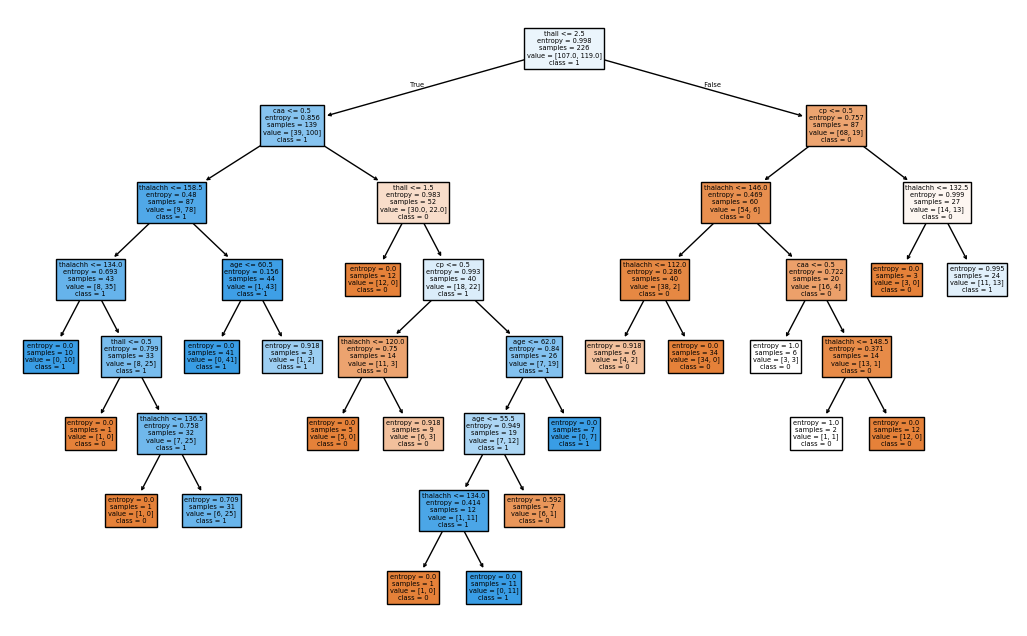

In [98]:
plt.figure(figsize=[13,8])
plot_tree(model,feature_names=model.feature_names_in_,class_names=[str(cls) for cls in model.classes_],filled=True)
plt.show()

In [99]:
model.feature_importances_

array([0.2148596 , 0.1117271 , 0.12006902, 0.35863739, 0.19470689])

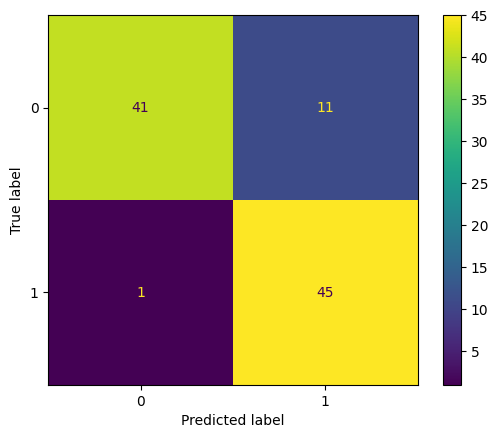

In [100]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [101]:
y_predict=model.predict(X_test)

In [102]:
accuracy_score(y_test,y_predict),balanced_accuracy_score(y_test,y_predict),cohen_kappa_score(y_test,y_predict)

(0.8775510204081632, 0.8833612040133779, 0.7572254335260116)

In [103]:
precision_score(y_test,y_predict,pos_label=1)

0.8035714285714286

In [104]:
recall_score(y_test,y_predict,pos_label=1)

0.9782608695652174